**Projeto final Ebac - Python Análise de Dados:** 

Análise Financeira

*Jessé Rodrigues*

## Descrição do problema

Análise financeira de dados para avaliar o perfil de clientes adimplentes e inadimplentes.

## Bibliotecas

In [ ]:
# Importando as bibliotecas

import pandas as pd
import operator as op
import seaborn as sns
import matplotlib.pyplot as plt


## Arquivo de dados

In [ ]:
# faz o download dos dados do repositório no github

URL = 'https://raw.githubusercontent.com/jesserodrigues-dev/analise_financeira/main/dados_financeiros.csv'

df = pd.read_csv(URL, na_values='na')

In [ ]:
# aprensenta as primeiras colunas dos dados

df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


## Funções usadas

In [ ]:
# cria função para calcular a porcentagem de clientes adimplentes/inadimplentes

def porcentagem(df: pd.DataFrame) -> None:
    
    qtd_total_linhas,_ = df.shape
    qtd_adimplentes,_ = df[df['default'] == 0].shape
    qtd_inadimplentes,_ = df[df['default'] == 1].shape

    print(f'{round(100 * qtd_adimplentes/qtd_total_linhas, 2)}% são clientes adimplentes. \n')
    print(f'{round(100 * qtd_inadimplentes/ qtd_total_linhas, 2)}% são clientes inadimplentes.')

    return None

In [ ]:
# cria uma função para filtrar a quantidade de dados faltantes e sua porcentagem relativa com o total de dados

def status_dados_faltantes(df: pd.DataFrame) -> list:

    status_dados_faltantes = []

    for coluna in df.columns:
        
        if df[coluna].isna().any():
            # salva em qtd o número de linhas das colunas que possuem dados faltantes
            qtd_linhas,_ = df[df[coluna].isna()].shape  
            # salva em qtd o número de linhas das colunas que possuem dados faltantes
            total_linhas,_ = df.shape  
            # cria um dicionário com os dados da coluna dos 'dados faltantes'
            dict_dados_faltantes = {coluna:
                {
                'quantidade': qtd_linhas,
                'porcentagem': round(100*qtd_linhas/total_linhas, 2) 
                }
            } 
            status_dados_faltantes.append(dict_dados_faltantes)

     
    return status_dados_faltantes

In [ ]:
# função para calcular a diferença entre a porcentagem de dados

def dif_dados_faltantes(df: pd.DataFrame) -> None:
  
  # atribui nomes aos conjuntos de dados
  dados_totais = status_dados_faltantes(df=df)
  dados_adimplentes = status_dados_faltantes(df=df[df['default'] == 0])
  dados_inadimplentes = status_dados_faltantes(df=df[df['default'] == 1])

  # cria variáveis auxiliares para receber os valores da porcentagem
  dados_adimplentes_aux = []
  dados_inadimplentes_aux = []
  # cria as variáveis porcentagem
  porcentagem_adimplentes = []
  porcentagem_inadimplentes = []


  for linha in dados_adimplentes:
    dados_adimplentes_aux.append(list(linha.values()))

  for i in range(0,len(dados_adimplentes_aux)):
    porcentagem_adimplentes.append(dados_adimplentes_aux[i][0].get('porcentagem'))

  for linha in dados_inadimplentes:
    dados_inadimplentes_aux.append(list(linha.values()))

  for i in range(0,len(dados_inadimplentes_aux)):
    porcentagem_inadimplentes.append(dados_inadimplentes_aux[i][0].get('porcentagem'))

  # imprime e calcula a diferença entre a porcentagem de adimplentes e inadimplentes
  difs = list(map(op.sub, porcentagem_adimplentes, porcentagem_inadimplentes))
  
  print(f'Escolaridade {round(difs[0],2)}% \n')
  print(f'Estado Civil {round(difs[1],2)}% \n')
  print(f'Salario Anual {round(difs[2],2)}% \n')

  return None

In [ ]:
# calcula a porcentagem de adimplentes/inadimplentes para uma dada coluna

def porcentagem_adim_inad(coluna: str, df: pd.DataFrame) -> None:

    dado_aux_total = {}
    dado_aux_adim = {}
    dado_aux_inad = {}
    dado_adim = {}
    dado_inad = {}
    dado_total = {}
    valores_totais = []
    valores_adim = []
    valores_inad = []

    linhas,_ = df.shape

    dado_aux_total = (df[coluna].value_counts().to_dict())
    dado_aux_adim = (df[df['default']==0][coluna].value_counts().to_dict())
    dado_aux_inad = (df[df['default']==1][coluna].value_counts().to_dict())

    dado_total = {key: val for key, val in sorted(dado_aux_total.items(), key = lambda ele: ele[0])}
    dado_adim = {key: val for key, val in sorted(dado_aux_adim.items(), key = lambda ele: ele[0])}
    dado_inad = {key: val for key, val in sorted(dado_aux_inad.items(), key = lambda ele: ele[0])}

    if len(dado_total) == len(dado_inad) and len(dado_total) == len(dado_adim):
        
        valores_totais= list(map(lambda v: v/linhas, dado_total.values()))
        valores_adim= list(map(op.truediv, dado_adim.values(), dado_total.values()))
        valores_inad= list(map(op.truediv, dado_inad.values(), dado_total.values()))

        for i,j,k in zip(dado_inad, valores_totais, valores_inad):
            
            print(f'Chave: {i},\n Porc. Total: {100*round(j,3)}%,\n Porc. Inadimplente: {100*round(k,3)}%,\n')

    return None

In [ ]:
#seleciona o estilo da grade nos gráficos

sns.set_style('whitegrid')

In [ ]:
# polot de dados categóricos

def dado_categorico(coluna: str, df: pd.DataFrame) -> None:

    titulos = [
        'Clientes',
        'Clientes Adimplentes',
        'Clientes Inadimplentes'
    ]

    eixo = 0
    max_y = 0
    #normaliza o eixo
    max = df.select_dtypes('object').describe()[coluna]['freq']*1.1

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df,df_adimplente,df_inadimplente]:
        
        df_to_plot = dataframe[coluna].value_counts().to_frame()
        df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.sort_values(by=[coluna], inplace=True)
        df_to_plot.sort_values(by=[coluna])

        f = sns.barplot(
            x=df_to_plot[coluna],
            y=df_to_plot['frequencia_absoluta'],
            ax=eixos[eixo]
        )

        f.set(
            title=titulos[eixo],
            xlabel=coluna.capitalize(),
            ylabel='Frequência Absoluta'
        )

        f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

        figura.show()

In [ ]:
# plot de gráficos para dados númericos

def dados_numericos(coluna: str, df: pd.DataFrame) -> None:

    titulos = [
        'Clientes', 'Clientes Adimplentes', 'Clientes Inadimplentes'
    ]

    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:
        f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(
            title=titulos[eixo],
            xlabel=coluna.capitalize(),
            ylabel='Frequência Absoluta'
        )

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    figura.show()

    return None

In [ ]:
# cria função para gráfico de relação entre variáveis

def rel_plot(x:str, y:str, hue = 'default', df= pd.DataFrame) -> None:

    f = sns.relplot(
        x=x,
        y=y,
        data=df,
        hue=hue
    )

    return None

# Data Wrangling

Performa modificações nos dados para apresentação e análise.

## Estrutura

Variável 'default':

0 -> Adimplentes

1 -> Inadimplentes

In [ ]:
porcentagem(df=df)

83.93% são clientes adimplentes. 

16.07% são clientes inadimplentes.


## Schema

In [ ]:
# tipo de dados (antes da limpeza)

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### Observações:
* limite_credito é categórico; converter para numérico
* valor_transacoes_12m é categórico; converter para numérico


## Dados faltantes

In [ ]:
# verificar quais colunas possuem dados faltantes

df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

### Observações:
* escolaridade, estado_civil e salario_anual possuem dados faltantes

In [ ]:
print('Dados totais faltantes: \n')

status_dados_faltantes(df=df)

Dados totais faltantes: 



[{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}},
 {'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}},
 {'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}]

In [ ]:
print('Dados adimplentes faltantes: \n')

status_dados_faltantes(df=df[df['default'] == 0])

Dados adimplentes faltantes: 



[{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}},
 {'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}},
 {'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}]

In [ ]:
print('Dados inadimplentes faltantes: \n')

status_dados_faltantes(df=df[df['default'] == 1])

Dados inadimplentes faltantes: 



[{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}},
 {'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}},
 {'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}]

In [ ]:
print('Diferença entre a porcentagem de dados que possuem colunas vazias: \n')

dif_dados_faltantes(df=df)

Diferença entre os porcentagem de dados que possuem colunas vazias: 

Escolaridade -0.87% 

Estado Civil -0.64% 

Salario Anual -0.61% 



### Observações:
* Os dados ausentes estão balanceados (menos de 1% de diferença entre eles), podem ser excluídos sem prejudicar a análise.


## Correção do Schema

Corrigir as variáveis que são categóricas e devem ser numéricas: limite_credito e valor_trasansacoes_12m

In [ ]:
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
converte = lambda valor: float(valor.replace(".", "").replace(",", "."))

# capturando o erro  que 'float' não possui replace. caso o código tenha sido rodado várias vezes.

try:
    df['limite_credito'] = df['limite_credito'].apply(lambda valor: 
                                                      float(valor.replace(".", "").replace(",", ".")))
    df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: 
                                                                  float(valor.replace(".", "").replace(",", ".")))

except AttributeError:
    print('A conversão para float já deve ter sido feita. Cheque! \n')

except Exception as exc:
    print(exc)

print('Tipo das variáveis após a conversão:\n')
df[['limite_credito','valor_transacoes_12m']].dtypes

A conversão para float já deve ter sido feita. Cheque! 

Tipo das variáveis após a conversão:



limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [ ]:
print('Dados númericos:')

# mostra dados estatísticas sobre os dados numéricos; não exibe 'id'

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

Dados númericos:


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [ ]:
print('Schema após correções:\n')

df.dtypes

Schema após correções:



id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

## Remoção de dados faltantes

---



In [ ]:
# remove os dados faltantes; 'inplace=True' para modificar a lista original

df.dropna(inplace=True)

In [ ]:
print('Shape dos dados após a limpeza:\n')
print(f"Adimplentes: {df[df['default']==0].shape}")
print(f"Inadimplentes: {df[df['default']==1].shape}")
print(f'Total: {df.shape}')

Shape dos dados após a limpeza:

Adimplentes: (5968, 16)
Inadimplentes: (1113, 16)
Total: (7081, 16)


In [ ]:
# porcentagem dos clientes após a limpeza dos dados.

porcentagem(df=df)

84.28% são clientes adimplentes. 

15.72% são clientes inadimplentes.


# Análise dos dados

In [ ]:
# definição de variáveis

df_adimplente = df[df['default']==0]
df_inadimplente = df[df['default']==1]

### Dados Categóricos

In [ ]:
print('Dados categóricos:\n')

# variável sexo não deve ser levada em conta
df.select_dtypes('object').describe().transpose().drop('sexo')

Dados categóricos:



,count,unique,top,freq
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


#### Escolaridade

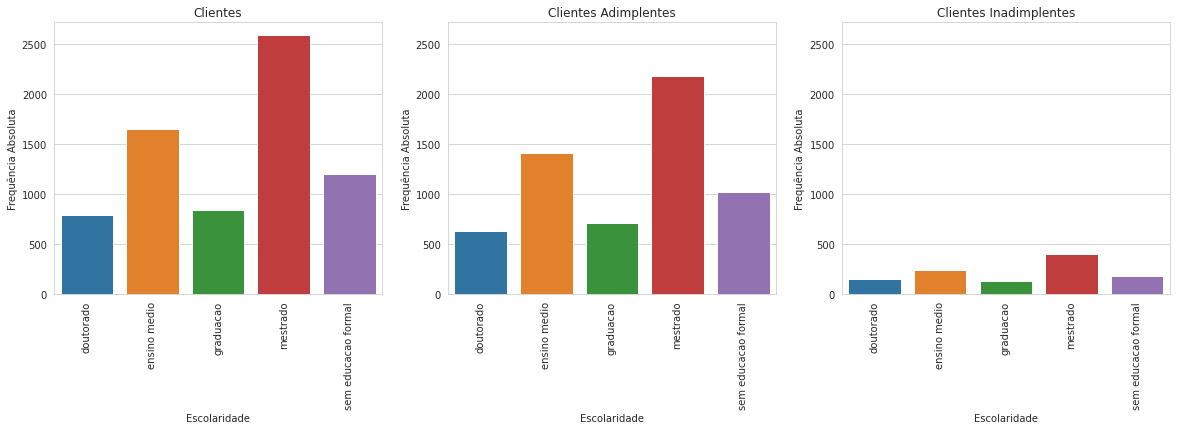

In [ ]:
dado_categorico(coluna='escolaridade', df=df)

In [ ]:
porcentagem_adim_inad('escolaridade', df=df)

Chave: doutorado,
 Porc. Total: 11.1%,
 Porc. Inadimplente: 19.3%,

Chave: ensino medio,
 Porc. Total: 23.3%,
 Porc. Inadimplente: 14.299999999999999%,

Chave: graduacao,
 Porc. Total: 11.899999999999999%,
 Porc. Inadimplente: 15.6%,

Chave: mestrado,
 Porc. Total: 36.6%,
 Porc. Inadimplente: 15.7%,

Chave: sem educacao formal,
 Porc. Total: 17.0%,
 Porc. Inadimplente: 15.4%,



* doutores são 11.1% do total, mas 19.3% dos inadimplentes
* as outras categorias estão na mesma faixa de inadimplência

#### Salário Anual

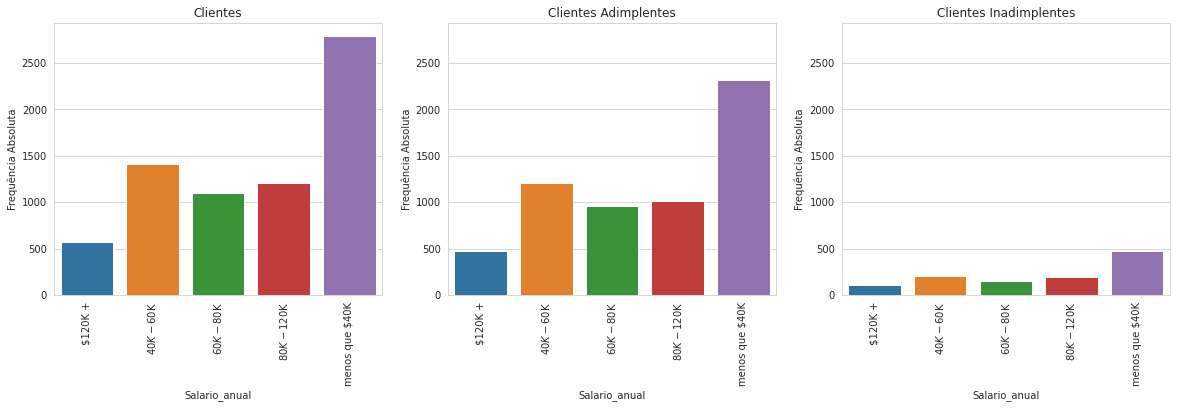

In [ ]:
dado_categorico('salario_anual',df=df)

In [ ]:
porcentagem_adim_inad('salario_anual', df=df)

Chave: $120K +,
 Porc. Total: 8.1%,
 Porc. Inadimplente: 17.8%,

Chave: $40K - $60K,
 Porc. Total: 19.900000000000002%,
 Porc. Inadimplente: 14.399999999999999%,

Chave: $60K - $80K,
 Porc. Total: 15.6%,
 Porc. Inadimplente: 13.100000000000001%,

Chave: $80K - $120K,
 Porc. Total: 17.0%,
 Porc. Inadimplente: 15.7%,

Chave: menos que $40K,
 Porc. Total: 39.4%,
 Porc. Inadimplente: 16.900000000000002%,



* +120K são 8.1% do total, mas 17.8% são inadimplentes
* Dos clientes com renda menos que 40K, 17% são inadimplentes
* Menor porcentagem está entre 40-80K de ser inadimplente

#### Tipo do Cartão

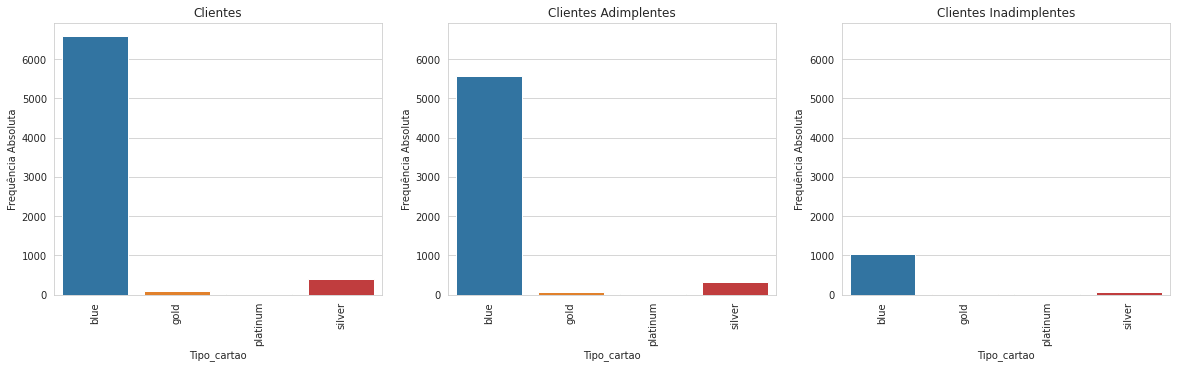

In [ ]:
dado_categorico('tipo_cartao', df=df)

In [ ]:
porcentagem_adim_inad('tipo_cartao', df=df)

Chave: blue,
 Porc. Total: 93.2%,
 Porc. Inadimplente: 15.7%,

Chave: gold,
 Porc. Total: 1.0999999999999999%,
 Porc. Inadimplente: 16.0%,

Chave: platinum,
 Porc. Total: 0.2%,
 Porc. Inadimplente: 27.3%,

Chave: silver,
 Porc. Total: 5.5%,
 Porc. Inadimplente: 16.1%,



In [ ]:
# apresenta a correlação entre os dados 'tipo_cartão' e salário anual

print('Inadimplente')
print(df[df['default']==1].value_counts(['tipo_cartao','salario_anual']))
print('\n')
print('Adimplente')
print(df[df['default']==0].value_counts(['tipo_cartao','salario_anual']))

Inadimplente
tipo_cartao  salario_anual 
blue         menos que $40K    451
             $40K - $60K       194
             $80K - $120K      166
             $60K - $80K       133
             $120K +            90
silver       $80K - $120K       20
             menos que $40K     16
             $120K +            10
             $60K - $80K        10
             $40K - $60K         7
gold         menos que $40K      4
             $80K - $120K        3
             $60K - $80K         2
             $40K - $60K         2
platinum     menos que $40K      2
gold         $120K +             2
platinum     $40K - $60K         1
dtype: int64


Adimplente
tipo_cartao  salario_anual 
blue         menos que $40K    2218
             $40K - $60K       1133
             $80K - $120K       922
             $60K - $80K        873
             $120K +            418
silver       menos que $40K      85
             $80K - $120K        78
             $40K - $60K         67
             $60K - $8

* Cartão 'blue' é maioria entre inadimplentes
* Sendo o cartão platinum, 27% dos seus clientes sejam inadimplentes. Contudo, a faixa salarial dos endividaos é menor que 60K.

#### Estado Civil

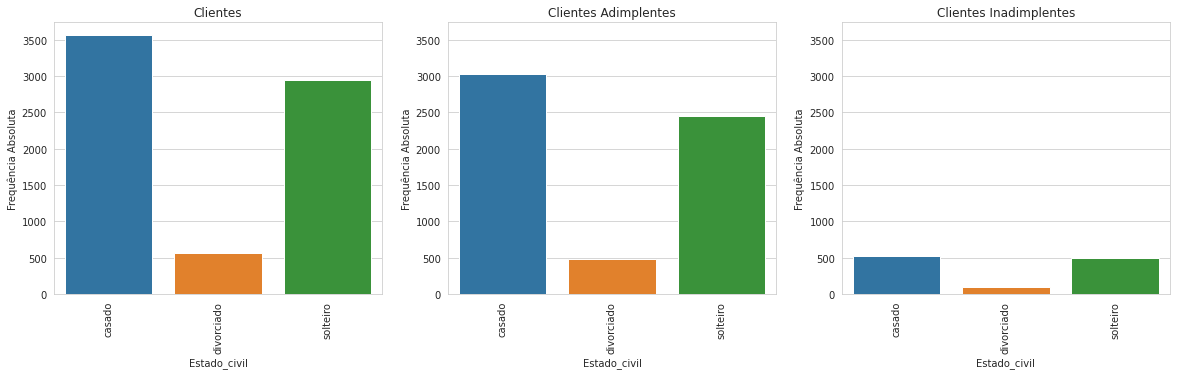

In [ ]:
# gráficos para o estado civil

dado_categorico('estado_civil', df=df)

In [ ]:
# porcentagem de clientes inadimplentes e seus estado civil

porcentagem_adim_inad('estado_civil', df=df)

Chave: casado,
 Porc. Total: 50.3%,
 Porc. Inadimplente: 14.799999999999999%,

Chave: divorciado,
 Porc. Total: 8.0%,
 Porc. Inadimplente: 16.2%,

Chave: solteiro,
 Porc. Total: 41.6%,
 Porc. Inadimplente: 16.7%,



In [ ]:
print('Inadimplente')
print(df[df['default']==1].value_counts(['estado_civil','salario_anual']))
print('\n')
print('Adimplente')
print(df[df['default']==0].value_counts(['estado_civil','salario_anual']))

Inadimplente
estado_civil  salario_anual 
casado        menos que $40K    218
solteiro      menos que $40K    215
casado        $40K - $60K       104
              $80K - $120K       88
solteiro      $40K - $60K        83
              $80K - $120K       81
casado        $60K - $80K        74
solteiro      $60K - $80K        62
              $120K +            51
casado        $120K +            45
divorciado    menos que $40K     40
              $80K - $120K       20
              $40K - $60K        17
              $60K - $80K         9
              $120K +             6
dtype: int64


Adimplente
estado_civil  salario_anual 
casado        menos que $40K    1156
solteiro      menos que $40K     981
casado        $40K - $60K        597
              $80K - $120K       547
solteiro      $40K - $60K        506
casado        $60K - $80K        483
solteiro      $80K - $120K       398
              $60K - $80K        390
casado        $120K +            252
divorciado    menos que $40K  

In [ ]:
print('Inadimplente')
print(df[df['default']==1].value_counts(['estado_civil','dependentes']))
print('\n')
print('Adimplente')
print(df[df['default']==0].value_counts(['estado_civil','dependentes']))

Inadimplente
estado_civil  dependentes
casado        3              178
              2              137
solteiro      3              127
              2              122
              1              101
casado        4               88
solteiro      4               70
casado        1               69
solteiro      0               55
casado        0               35
divorciado    2               26
              3               24
casado        5               22
solteiro      5               17
divorciado    1               14
              4               13
              0               11
              5                4
dtype: int64


Adimplente
estado_civil  dependentes
casado        2              843
              3              808
solteiro      3              650
              2              622
casado        1              558
solteiro      1              469
casado        4              450
solteiro      4              374
casado        0              248
solteiro      0   

* divorciados são 8.0% dos clientes, mas 16.2% de inadimplentes


## Dados Númericos


In [ ]:
df.drop(['id','default'],axis=1).select_dtypes('number').head(n=5).transpose()

,0,1,2,4,5
idade,45.00,49.00,51.00,40.00,44.00
dependentes,3.00,5.00,3.00,3.00,2.00
meses_de_relacionamento,39.00,44.00,36.00,21.00,36.00
qtd_produtos,5.00,6.00,4.00,5.00,3.00
iteracoes_12m,3.00,2.00,0.00,0.00,2.00
meses_inativo_12m,1.00,1.00,1.00,1.00,1.00
limite_credito,12691.51,8256.96,3418.56,4716.22,4010.69
valor_transacoes_12m,1144.90,1291.45,1887.72,816.08,1088.07
qtd_transacoes_12m,42.00,33.00,20.00,28.00,24.00


#### Idade


In [ ]:
print('Adimplentes')
df[df['default']==0]['idade'].describe()

Adimplentes


count    5968.000000
mean       46.317359
std         8.092984
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: idade, dtype: float64

In [ ]:
print('Inadimplentes')
df[df['default']==1]['idade'].describe()

Inadimplentes


count    1113.000000
mean       46.510332
std         7.759314
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        68.000000
Name: idade, dtype: float64

* A média das idades é a mesma para adimplentes e inadimplentes.

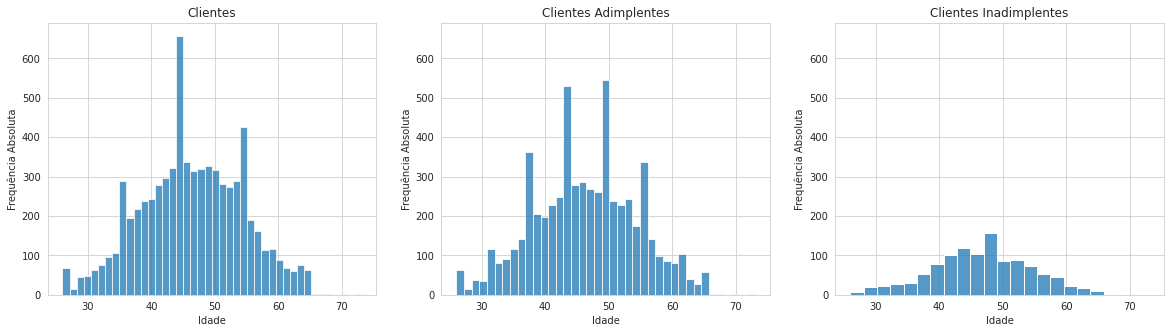

In [ ]:
dados_numericos('idade', df=df)

#### Dependentes


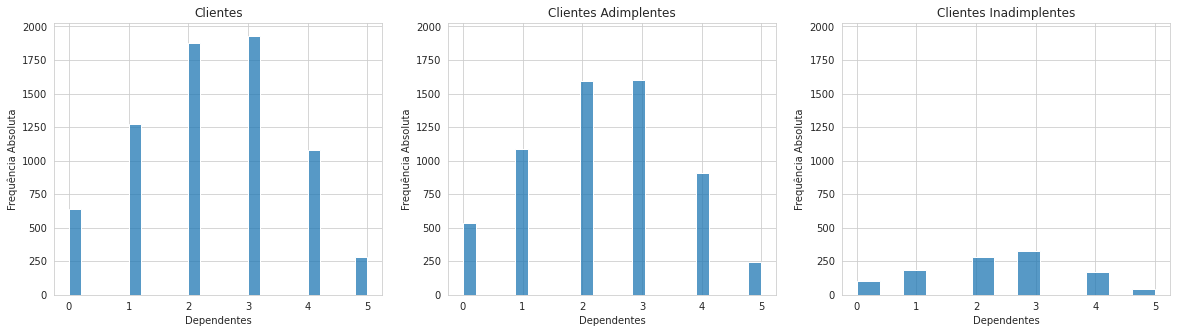

In [ ]:
dados_numericos('dependentes', df=df)

In [ ]:
# porcentagem de clientes inadimplentes e o número de dependentes

porcentagem_adim_inad('dependentes', df=df)

Chave: 0,
 Porc. Total: 9.0%,
 Porc. Inadimplente: 15.9%,

Chave: 1,
 Porc. Total: 18.0%,
 Porc. Inadimplente: 14.399999999999999%,

Chave: 2,
 Porc. Total: 26.5%,
 Porc. Inadimplente: 15.2%,

Chave: 3,
 Porc. Total: 27.200000000000003%,
 Porc. Inadimplente: 17.1%,

Chave: 4,
 Porc. Total: 15.2%,
 Porc. Inadimplente: 15.9%,

Chave: 5,
 Porc. Total: 4.0%,
 Porc. Inadimplente: 15.1%,



In [ ]:
print('Inadimplente')
print(df[df['default']==1].value_counts(['dependentes','salario_anual']))
print('\n')
print('Adimplente')
print(df[df['default']==0].value_counts(['dependentes','salario_anual']))

Inadimplente
dependentes  salario_anual 
3            menos que $40K    128
2            menos que $40K    112
1            menos que $40K     91
4            menos que $40K     75
3            $80K - $120K       69
             $40K - $60K        63
0            menos que $40K     53
2            $40K - $60K        48
             $80K - $120K       48
3            $60K - $80K        43
2            $120K +            41
             $60K - $80K        36
1            $40K - $60K        35
4            $40K - $60K        35
             $80K - $120K       29
3            $120K +            26
1            $80K - $120K       25
             $60K - $80K        21
4            $60K - $80K        19
0            $60K - $80K        18
             $40K - $60K        15
5            menos que $40K     14
4            $120K +            13
1            $120K +            12
0            $80K - $120K       10
5            $40K - $60K         8
             $60K - $80K         8
             $

* Ter 3 dependentes leva a uma leve alta de inadimplência c Contudo, não ter depedentes também é um risco. 
* 5 dependentes são 4.0% do clientes, mas são 15.1% dos inadimplentes
* 0 dependentes são 9.0% dos clientes, mas são 15.9% dos inadimplentes
* Ter 1 dependente é o mais seguro para evitar inadimplência, se renda maior que 40K
* Ganhar menos de 40K e ter +1 de um dependente é alto risco de inadimplência

#### Quantidade de Produtos


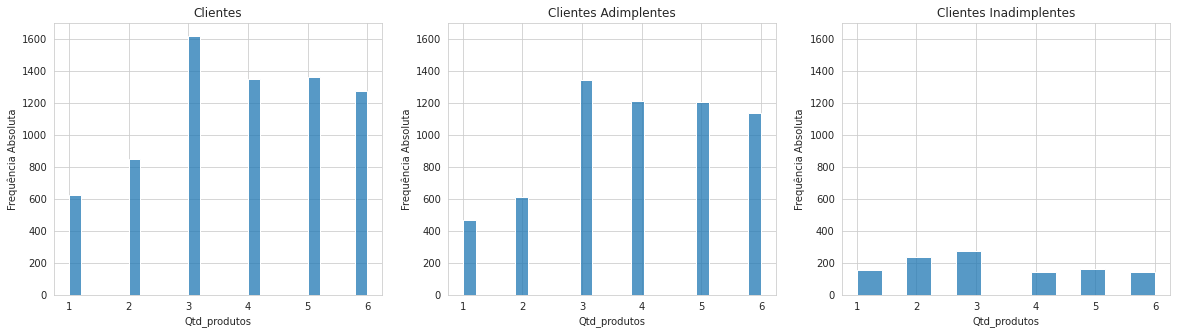

In [ ]:
dados_numericos('qtd_produtos', df=df)

In [ ]:
porcentagem_adim_inad('qtd_produtos', df=df)

Chave: 1,
 Porc. Total: 8.9%,
 Porc. Inadimplente: 25.2%,

Chave: 2,
 Porc. Total: 12.0%,
 Porc. Inadimplente: 27.800000000000004%,

Chave: 3,
 Porc. Total: 22.8%,
 Porc. Inadimplente: 17.1%,

Chave: 4,
 Porc. Total: 19.1%,
 Porc. Inadimplente: 10.4%,

Chave: 5,
 Porc. Total: 19.2%,
 Porc. Inadimplente: 11.700000000000001%,

Chave: 6,
 Porc. Total: 18.0%,
 Porc. Inadimplente: 11.1%,



In [ ]:
print('Inadimplente')
print(df[df['default']==1].value_counts(['qtd_produtos','salario_anual']))
print('\n')
print('Adimplente')
print(df[df['default']==0].value_counts(['qtd_produtos','salario_anual']))

Inadimplente
qtd_produtos  salario_anual 
3             menos que $40K    129
2             menos que $40K     77
5             menos que $40K     73
4             menos que $40K     69
6             menos que $40K     65
1             menos que $40K     60
2             $80K - $120K       47
              $40K - $60K        47
3             $80K - $120K       45
              $40K - $60K        44
2             $60K - $80K        38
3             $60K - $80K        36
1             $80K - $120K       36
              $40K - $60K        32
4             $40K - $60K        27
5             $40K - $60K        27
6             $40K - $60K        27
2             $120K +            27
3             $120K +            23
5             $60K - $80K        22
              $80K - $120K       21
4             $80K - $120K       21
6             $80K - $120K       19
              $60K - $80K        18
5             $120K +            17
1             $60K - $80K        16
4             $60K - $

* ter um produto são 8.9% dos clientes, mas são 25.2% dos inadimplentes
* ter dois produtos são 12% dos clientes, são 27.8% dos inadimplentes
* 3+ produtos, baixa inadimplência

#### Limite de crédito

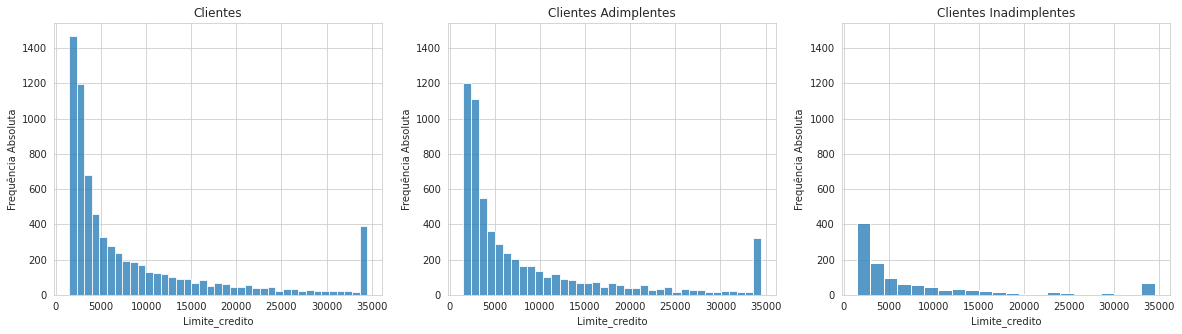

In [ ]:
dados_numericos('limite_credito', df=df)

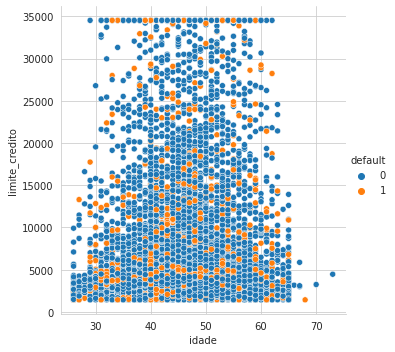

In [ ]:
#gráfico relacionando idade e limite de crédito

rel_plot('idade', 'limite_credito', df=df)

* com um limite próximo de $5000, pessoas entre 40-60 anos podem ter risco a inadimplência

#### Valor das transações nos últimos 12 meses

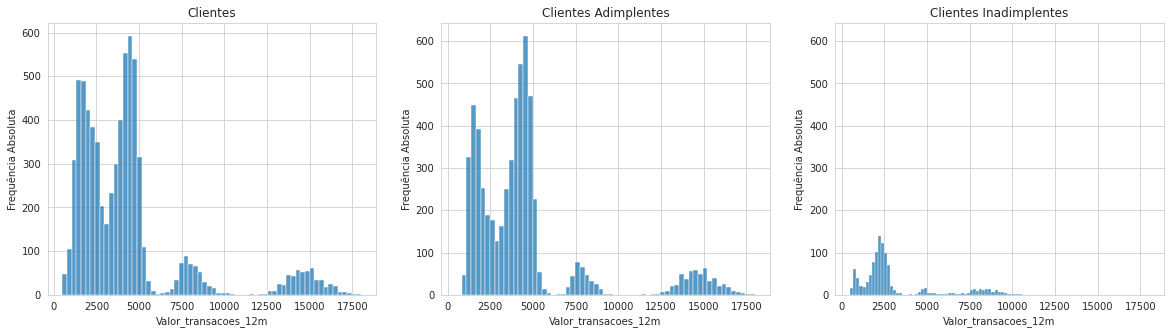

In [ ]:
dados_numericos('valor_transacoes_12m', df=df)

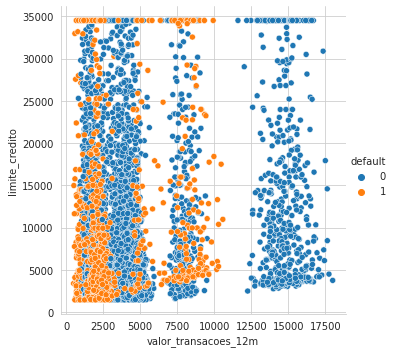

In [ ]:
#gráfico relacionando valor de transação nos últimos 12 meses e limite de crédito

rel_plot('valor_transacoes_12m', 'limite_credito', df=df)

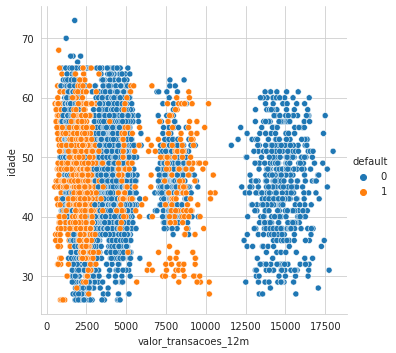

In [ ]:
#gráfico relacionando valor de transação nos últimos 12 meses e idade

rel_plot('valor_transacoes_12m', 'idade', df=df)

* Acima de 12500, para todas as idades, não há inadimplentes
* Para valores concentrados em $2500, para todas as idades, há chances de inadimplência
* entre 3000-6000, por valor de transação, a inadimplência diminui. especialmente entre 20-35 anos.
* entre 6000-10000, por valor de transação, para idades 25-35, o risco de inadimplência é muito alto

#### Quantidade de Transações em 12m


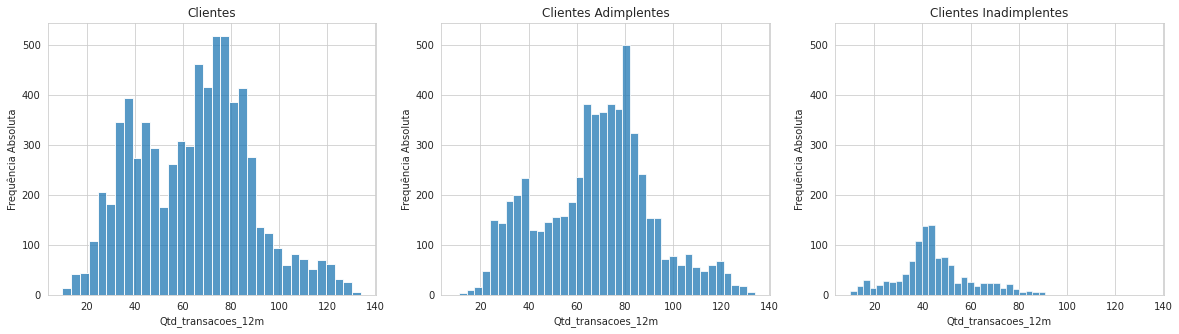

In [ ]:
dados_numericos('qtd_transacoes_12m', df=df)

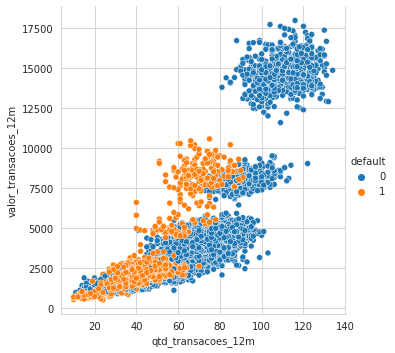

In [ ]:
#gráfico relacionando quantidade de transações nos últimos 12 meses e valor de transações nos últimos 12 meses

rel_plot('qtd_transacoes_12m', 'valor_transacoes_12m', df=df)

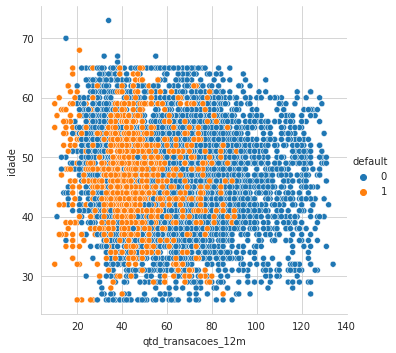

In [ ]:
#gráfico relacionando quantidade de transações nos últimos 12 meses e idade

rel_plot('qtd_transacoes_12m', 'idade', df=df)

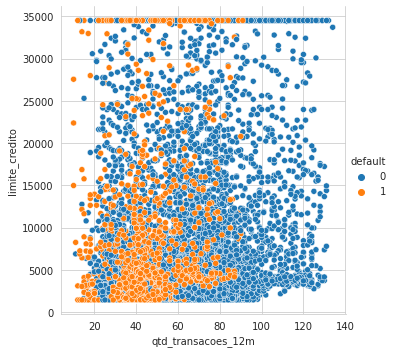

In [ ]:
#gráfico relacionando quantidade de transações nos últimos 12 meses e limite de crédito

rel_plot('qtd_transacoes_12m', 'limite_credito', df=df)

# Insights

1. Doutores são 8.1% dos clientes, mas são 19% dos inadimplentes. Outros graus de estudo estão entre 15% de inadimplência.

2. Clientes com renda anual +120K são 8.1% do total, mas são 17.8% dos inadimplentes. 

3. Clientes com renda menor que 40K anual são maior base de inadimplentes.

4. Clientes com cartão platinum, mas com renda abaixo de 60K tem 27% de inadimplência.

5. Divorciados são 8.0% dos clientes, mas compõem 16.2% dos inadimplentes. Destes, maioria ganha mesmo que 60K. E, ter 2 ou 3 dependentes aumenta o risco de inadimplência.

6. Ter 3 ou mais produtos tem baixa taxa de inadimplência. 

7. Limite de crédito próximo de $5000 tem risco de inadimplência. O risco aumenta para as idades 40-60 anos.

8. Acima de 12500 por transação, não há inadimplentes.

9. Até $3000 por transação, há altas chances de inadimplência.

10. Entre 6000-10000, por valor de transação, para idades 25-35, o risco de inadimplência é muito alto.

11. Abaixo de $5000 de limite de crédito, e com a quantidade de transações até 60, o risco de inadimplência é alto.

12. Com 30-60 transações por ano, todas as as idades tem alto risco de inadimplência.

13. Número de transações acima de 80, com valores entre 5000-8000, tem baixo risco de inadimplência.

14. Número de transações entre 60-80, com valores entre 7500-10000, tem alto risco de inadimplência.
